# The TensorFlow Dataset API

Source: https://www.tensorflow.org/guide/data

In this notebook, we'll see some examples of using the `tf.data.Dataset` API to build input pipelines.

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import os

import matplotlib.pyplot as plt

2022-10-29 13:01:07.327095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-29 13:01:07.446887: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-29 13:01:07.451790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-29 13:01:07.451807: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

### Create Datasets from In-memory Tensors

The easiest way to create datasets is starting from in-memory data (Python lists, Numpy arrays, TF tensors, etc.)

In [2]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

for d in dataset:
    print(d.numpy())

8
3
0
8
2
1
2022-10-29 13:01:32.418574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-29 13:01:32.418610: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-29 13:01:32.418630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-7817b2ad-42a3-441f-8072-b020be286d3c): /proc/driver/nvidia/version does not exist
2022-10-29 13:01:32.418956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Iterate over datasets

We can also iteate on datasets using the Python `iter()` construct.

In [3]:
it = iter(dataset)
print(next(it).numpy())
print(next(it).numpy())

8
3


In [4]:
print(next(it).numpy())

0


In [5]:
print(next(it))

tf.Tensor(8, shape=(), dtype=int32)


##### Inspect the type of each element

We can inspect the type of each dataset element as follows. In this example, each element is a rank-1 tensor of length 10 and type `float32`.

In [6]:
randmat = tf.random.uniform([4, 10, 10])

In [7]:
print(randmat)

tf.Tensor(
[[[3.24223518e-01 1.84010506e-01 6.79945946e-03 6.25218272e-01
   8.78010750e-01 9.75551605e-01 8.18135262e-01 1.42695069e-01
   2.27630258e-01 3.00155282e-01]
  [5.12845159e-01 1.47859573e-01 6.14214778e-01 2.03546405e-01
   7.14800358e-02 8.78812075e-02 3.07019472e-01 9.35174584e-01
   7.68663168e-01 7.03608632e-01]
  [9.44643140e-01 5.80044389e-01 8.62012982e-01 3.82856369e-01
   7.10709691e-01 6.22976303e-01 9.84600544e-01 8.76950860e-01
   1.76721454e-01 2.67727256e-01]
  [2.41026521e-01 9.82456923e-01 2.83410907e-01 7.29562044e-01
   4.69627380e-01 2.45983481e-01 4.82969165e-01 1.22684360e-01
   3.97774696e-01 1.37087345e-01]
  [3.35687995e-01 2.40982056e-01 4.40122485e-01 8.04740906e-01
   4.29391861e-04 9.29710269e-01 1.26780868e-01 2.43248582e-01
   7.21935749e-01 5.39494991e-01]
  [4.23849344e-01 8.16426754e-01 4.72029567e-01 6.69028521e-01
   2.09162951e-01 3.44393253e-02 5.45623779e-01 2.92251825e-01
   8.82816911e-01 3.00136805e-02]
  [2.26839662e-01 4.59786773e

In [8]:
dataset1 = tf.data.Dataset.from_tensor_slices(randmat)

In [9]:
dataset1.element_spec

TensorSpec(shape=(10, 10), dtype=tf.float32, name=None)

In [10]:
print(next(iter(dataset1)))

tf.Tensor(
[[3.2422352e-01 1.8401051e-01 6.7994595e-03 6.2521827e-01 8.7801075e-01
  9.7555161e-01 8.1813526e-01 1.4269507e-01 2.2763026e-01 3.0015528e-01]
 [5.1284516e-01 1.4785957e-01 6.1421478e-01 2.0354640e-01 7.1480036e-02
  8.7881207e-02 3.0701947e-01 9.3517458e-01 7.6866317e-01 7.0360863e-01]
 [9.4464314e-01 5.8004439e-01 8.6201298e-01 3.8285637e-01 7.1070969e-01
  6.2297630e-01 9.8460054e-01 8.7695086e-01 1.7672145e-01 2.6772726e-01]
 [2.4102652e-01 9.8245692e-01 2.8341091e-01 7.2956204e-01 4.6962738e-01
  2.4598348e-01 4.8296916e-01 1.2268436e-01 3.9777470e-01 1.3708735e-01]
 [3.3568799e-01 2.4098206e-01 4.4012249e-01 8.0474091e-01 4.2939186e-04
  9.2971027e-01 1.2678087e-01 2.4324858e-01 7.2193575e-01 5.3949499e-01]
 [4.2384934e-01 8.1642675e-01 4.7202957e-01 6.6902852e-01 2.0916295e-01
  3.4439325e-02 5.4562378e-01 2.9225183e-01 8.8281691e-01 3.0013680e-02]
 [2.2683966e-01 4.5978677e-01 7.9190350e-01 9.8980701e-01 2.1834505e-01
  6.9035244e-01 1.4727664e-01 1.2474525e-01 4.5

In [11]:
len(dataset1)

4

In [ ]:
dataset_xx = tf.data.Dataset.from_tensors([randmat, randmat])

In [ ]:
print(len(dataset_xx))
dataset_xx.element_spec

##### Datasets with multiple components

We can create datasets in which each element has multiple components. Here, the first element is a scalar float, and the second element is a rank-1 tensor of 10 integers.

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((
    tf.random.uniform([4]),
    tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)
))

print(dataset.element_spec)
print(len(dataset))

for d in dataset:
    print(d[0].numpy(), d[1].numpy())


(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None))
4
0.61018324 [6 1 9 6 8 9 1 8 1 2]
0.41405833 [0 9 8 9 1 7 3 2 4 6]
0.98618877 [1 1 5 4 2 9 4 9 2 6]
0.59476113 [8 3 9 2 3 8 7 9 1 0]


Alternatively, components can be specified with a name using a dictionary.

In [13]:
dataset = tf.data.Dataset.from_tensor_slices(
   {'output': tf.random.uniform([4]),
    'input': tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)})

print(dataset.element_spec)
print(len(dataset))
for d in dataset:
    print('output:', d['output'].numpy(), 'input:', d['input'].numpy())

{'output': TensorSpec(shape=(), dtype=tf.float32, name=None), 'input': TensorSpec(shape=(10,), dtype=tf.int32, name=None)}
4
output: 0.06932092 input: [9 6 4 8 4 2 7 4 2 7]
output: 0.45129824 input: [2 3 7 2 2 3 4 7 6 1]
output: 0.43326557 input: [0 9 4 9 5 7 9 2 2 6]
output: 0.88069284 input: [0 0 0 5 1 1 5 5 4 6]


##### A more realistic example

Let's use `keras.datasets` to retrieve MNIST and convert it to a `tf.data.Dataset`. Train and test are two tuples of (images, labels). So, they can be directly passed to `from_tensor_slices()`. As shown by `element_spec` images are 28x28, while labels are scalar.

In [14]:
train, test = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
print(len(train))
print(train[0].shape)
print(train[1].shape)

2
(60000, 28, 28)
(60000,)


In [16]:
train_ds = tf.data.Dataset.from_tensor_slices(train)
test_ds = tf.data.Dataset.from_tensor_slices(test)

print(len(train_ds))
print(len(test_ds))
print(train_ds.element_spec)

60000
10000
(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


### Create datasets from text files

Let's see an example of one of the many alternative data sources that we can use to build datasets. The `keras.utils.get_file` is a convenient function to fetch files from URLs. Here, we'll use it to download three text files corresponding to three different translations of the Illiad. Files are downloaded under the usual hidden keras folder.



In [17]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

print(file_paths)

807992/807992 [==============================] - 0s 0us/step
['/root/.keras/datasets/cowper.txt', '/root/.keras/datasets/derby.txt', '/root/.keras/datasets/butler.txt']


The `TextLineDataset` class can digest turn multiple files into a dataset, in which each line is an element. 

The `take(<N>)` method fetches the first `<N>` elements from the dataset.

In [18]:
dataset = tf.data.TextLineDataset(file_paths)

In [19]:
for line in dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [20]:
it = iter(dataset)

In [21]:
print(next(it).numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"


### Create Datasets from CSV Files

As a final example of source, let's digest a CSV file with the help of Pandas. For this, we'll use the [Titanic](https://www.tensorflow.org/datasets/catalog/titanic) dataset, which is used to predict the survival of Titanic passengers based on features such as age, sex, ticket class, etc.

We start by reading the CSV in pandas.

In [22]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file, index_col=None)
df.head()


30874/30874 [==============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [33]:
DeepnoteChart(df, """{"mark":{"type":"bar","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"nominal","field":"sex","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"survived","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"sex","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","autosize":{"type":"fit"},"config":{"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"},"title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"}}}""")

We can then convert this to a TF Dataset by passing through an intermediate conversion to a Python dictionary, so to preserve column names

In [27]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(4):
    for key, value in feature_batch.items():
        print("{}: {}, ".format(key, value), end='')
    print("\n")

survived: 0, sex: b'male', age: 22.0, n_siblings_spouses: 1, parch: 0, fare: 7.25, class: b'Third', deck: b'unknown', embark_town: b'Southampton', alone: b'n', 

survived: 1, sex: b'female', age: 38.0, n_siblings_spouses: 1, parch: 0, fare: 71.2833, class: b'First', deck: b'C', embark_town: b'Cherbourg', alone: b'n', 

survived: 1, sex: b'female', age: 26.0, n_siblings_spouses: 0, parch: 0, fare: 7.925, class: b'Third', deck: b'unknown', embark_town: b'Southampton', alone: b'y', 

survived: 1, sex: b'female', age: 35.0, n_siblings_spouses: 1, parch: 0, fare: 53.1, class: b'First', deck: b'C', embark_town: b'Southampton', alone: b'n', 



### Transforming Datasets

Let's see some dataset transformations. Let's use MNIST for this part.

In [34]:
train, test = keras.datasets.fashion_mnist.load_data()

##### Zipping

Let's assume that, for any reason, we didn't directly generate a dataset using the (images, labels) tuple, and instead we have separate datasets for inputs and outputs (ordered in the same way).

In [35]:
train_x, train_y = train

In [36]:

train_x = tf.data.Dataset.from_tensor_slices(train_x)
train_y = tf.data.Dataset.from_tensor_slices(train_y)

print(train_x.element_spec)
print(train_y.element_spec)

TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)
TensorSpec(shape=(), dtype=tf.uint8, name=None)


We can go back to the more convenient single Dataset using the `zip()` transformation.

In [37]:
train = tf.data.Dataset.zip((train_x, train_y))
print(train.element_spec)

# let's save this version of the dataset for later
train_orig = train

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


##### Batching

Right now, each element contains a single image and label:

In [38]:
for elem in train.take(4):
    print(elem[0].numpy().shape, elem[1].numpy())

(28, 28) 9
(28, 28) 0
(28, 28) 0
(28, 28) 3


We can create batches of 32 images with:

In [39]:
train = train.batch(32)

In [40]:
for elem in train.take(4):
    print(elem[0].numpy().shape, elem[1].numpy().shape)

(32, 28, 28) (32,)
(32, 28, 28) (32,)
(32, 28, 28) (32,)
(32, 28, 28) (32,)


##### Shuffling

We can also shuffle the dataset. Shuffling takes a buffer size.

In [41]:
train = train_orig.shuffle(100).batch(32)

The order of batching and shuffling matters. To see this, we can add an index to each element:

In [42]:
counter = tf.data.experimental.Counter()
train_idx = tf.data.Dataset.zip((counter, train_x, train_y))
print(train_idx.element_spec)

(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [43]:
for elem in train_idx.take(4):
    print(elem[0].numpy(), elem[1].numpy().shape, elem[2].numpy())

0 (28, 28) 9
1 (28, 28) 0
2 (28, 28) 0
3 (28, 28) 3


Shuffle before batching. Elements in the first batch cannot have indexes larger than 131:

In [44]:
train_sb = train_idx.shuffle(100).batch(32)

for elem in train_sb.take(4):
    print(elem[0].numpy())

[ 79  13  21  61  28  27  88  69  81  10 104  95  66  38   1   7  60  26
  32  62  36   0  73  48 112  91 109  80  30  86 117  42]
[114  40  53  76  70  84  58 102  16  31  11  47 113  55  17 136 106  41
  23 103  19  65  77 116  89   5   2  39 131 100 134  75]
[ 18  64 165 120 139 159  72 108 171 138 119  15 140  92  22  83 118 179
 154  85 137  82 167 149 126 181 162 101  14  35 174 152]
[  8  68  49 188  94 187 168   9  93 145 182 195 158 141 178  24  29  12
 169  56 122  74 157 123 180  71 127 217  59 220 184 105]


Batch before shuffling:

In [45]:
train_sb = train_idx.batch(32).shuffle(100)

for elem in train_sb.take(4):
    print(elem[0])

tf.Tensor(
[1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773
 1774 1775 1776 1777 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787
 1788 1789 1790 1791], shape=(32,), dtype=int64)
tf.Tensor(
[128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159], shape=(32,), dtype=int64)
tf.Tensor(
[2848 2849 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861
 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875
 2876 2877 2878 2879], shape=(32,), dtype=int64)
tf.Tensor(
[3168 3169 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181
 3182 3183 3184 3185 3186 3187 3188 3189 3190 3191 3192 3193 3194 3195
 3196 3197 3198 3199], shape=(32,), dtype=int64)


### More advanced preprocessing

Let's see one example of more advanced preprocessing using the map function. Let's normalize the MNIST dataset to 0:1.

In [46]:
def normalize(X, y):
    X_norm = tf.cast(X, tf.float32) / 255.0
    return X_norm, y


In [47]:
train = train_orig.map(normalize).shuffle(100).batch(4)

In [48]:
print(next(iter(train))[0][0,10:20,10:20])
print(next(iter(train_orig))[0][10:20,10:20])

tf.Tensor(
[[0.75686276 0.84313726 0.77254903 0.7921569  0.99215686 0.9019608
  0.8509804  0.7921569  0.90588236 0.03529412]
 [0.7764706  0.8117647  0.79607844 0.8039216  0.67058825 0.99215686
  0.81960785 0.8235294  0.8666667  0.        ]
 [0.78431374 0.76862746 0.972549   0.34509805 0.18039216 1.
  0.83137256 0.8235294  0.8235294  0.        ]
 [0.7647059  0.8        0.96862745 0.         0.15294118 1.
  0.827451   0.8352941  0.7921569  0.        ]
 [0.74509805 0.9411765  0.58431375 0.         0.01568628 1.
  0.84313726 0.84313726 0.7411765  0.        ]
 [0.78039217 0.98039216 0.15686275 0.         0.         0.99607843
  0.85490197 0.84705883 0.69411767 0.        ]
 [0.81960785 0.96862745 0.00392157 0.         0.         0.9372549
  0.88235295 0.85490197 0.65882355 0.        ]
 [0.84705883 0.8980392  0.         0.         0.         0.827451
  0.90588236 0.8627451  0.6039216  0.        ]
 [0.8627451  0.8156863  0.         0.         0.         0.7607843
  0.91764706 0.87058824 0.5490

##### Reading images with map()

We can also use the map function to convert a dataset that contains filenames to one that contains images.

In [49]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
print(flowers_root + '/*/*')

list_ds = tf.data.Dataset.list_files(str(flowers_root + '/*/*'))

for elem in list_ds.take(5):
     print(elem.numpy())

228813984/228813984 [==============================] - 1s 0us/step
/root/.keras/datasets/flower_photos/*/*
b'/root/.keras/datasets/flower_photos/dandelion/5776879272_95008399c3.jpg'
b'/root/.keras/datasets/flower_photos/tulips/9048307967_40a164a459_m.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/8168031302_6e36f39d87.jpg'
b'/root/.keras/datasets/flower_photos/daisy/2666572212_2caca8de9f_n.jpg'
b'/root/.keras/datasets/flower_photos/daisy/10993818044_4c19b86c82.jpg'


Let's write a function to read one image from the filename, and also determine the label based on the path:

In [50]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)

    # the folder name is the label
    label = parts[-2]

    # read and resize the image
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

We can test this function on a single image first:

b'tulips'


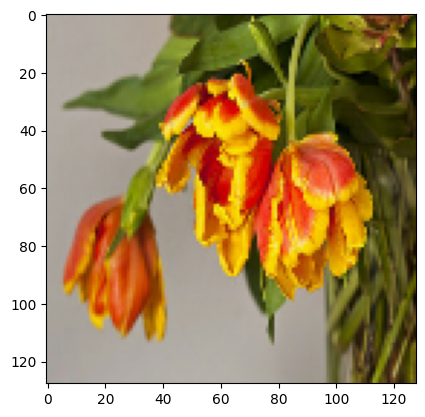

In [51]:
image, label = parse_image(next(iter(list_ds)))
plt.imshow(image)
print(label.numpy())

Then, we can use map to apply it to the entire dataset:

In [52]:
image_ds = list_ds.map(parse_image)

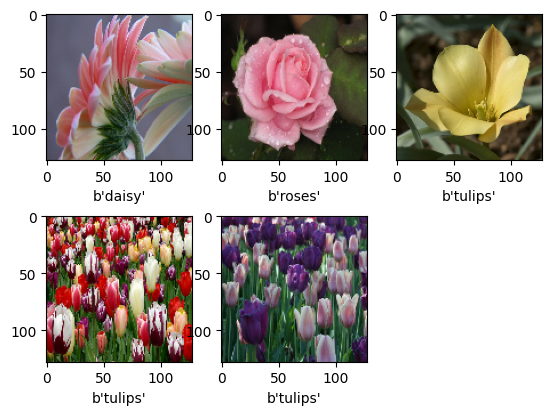

In [53]:
fig = plt.figure()

for i, elem in enumerate(image_ds.take(5)):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(elem[0])
    ax.set_xlabel(elem[1].numpy())
    ax.grid(False)

### Optimizing performance

We can improve the performance of input pipelines by:
- Prefetching
- Caching
- Applying map in parallel
- Etc.

This is particularly useful for datasets that process files stored on disk (not in-memory data).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7817b2ad-42a3-441f-8072-b020be286d3c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>